
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data in dataframe
df=pd.read_csv("train.csv")

In [3]:
#Find the average age of those who survived and those who did not
mean_age_survived=df[df['Survived']==1]['Age'].mean()
mean_age_notsurvived=df[~(df['Survived']==1)]['Age'].mean()

print(f"Mean age survived: {mean_age_survived:.1f}")
print(f"Mean age not survived: {mean_age_notsurvived:.1f}")

Mean age survived: 28.3
Mean age not survived: 30.6



## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [4]:
# !pip install missingno

In [5]:
import missingno as msno

#### Investigate missing values

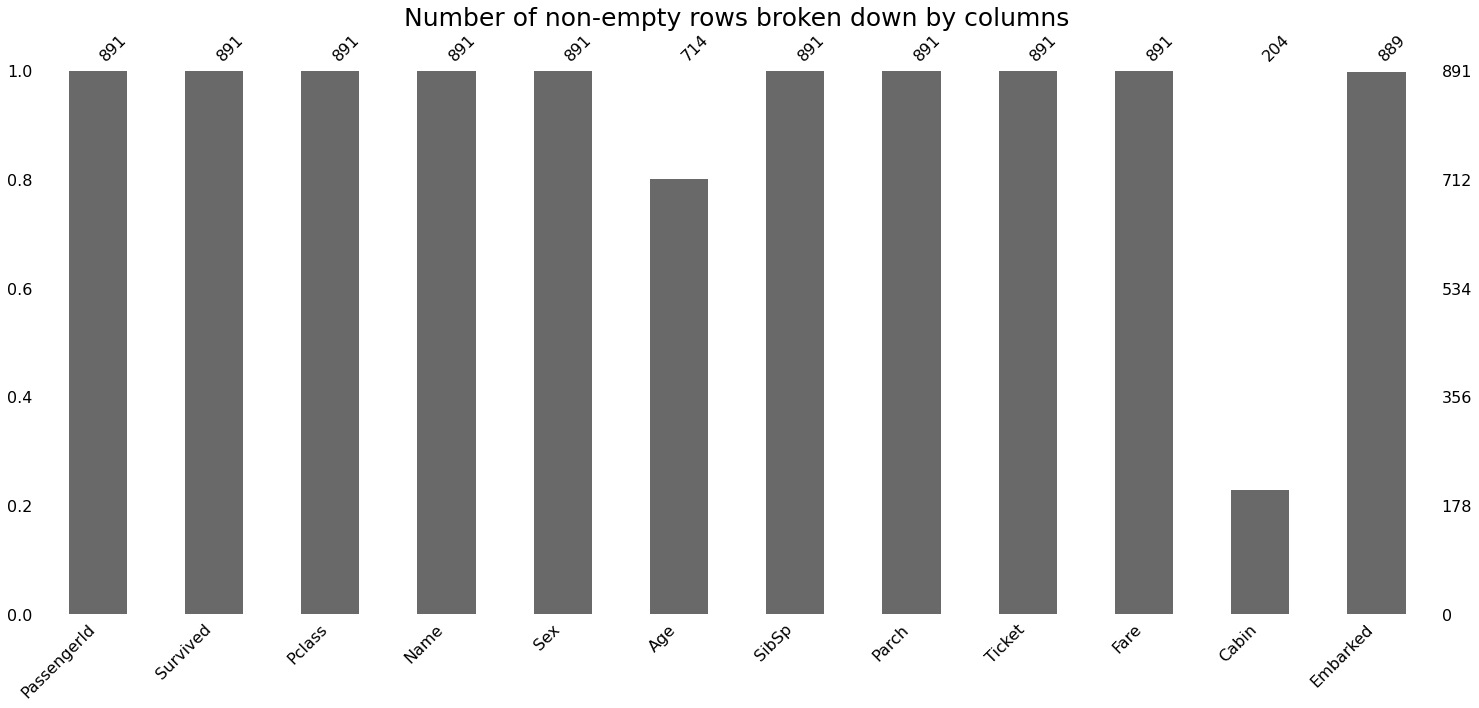

In [6]:
msno.bar(df)
_=plt.title("Number of non-empty rows broken down by columns",fontdict={'fontsize':25})

In [7]:
df.isnull().sum().sort_values(ascending=False)[0:1]

Cabin    687
dtype: int64

<b>Cabin</b> has the most number of NaN rows, at 687.

#### Drop rows with Embaked=NaN

In [8]:
df.dropna(subset="Embarked",inplace=True)

#### Fill Cabin=NaN with **¯\\_(ツ)_/¯**

In [9]:
df['Cabin']=df['Cabin'].fillna("¯\(ツ)/¯")

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

#### Column <code>FamilyCount</code> to be equal to <code>SibSp</code> + <code>Prch</code>

In [11]:
df['FamilyCount']=df['SibSp']+df['Parch']

#### Column <code>IsReverend</code> depending on their title in name.

In [12]:
df['IsReverend']=df['Name'].str.contains('Rev.',regex=False).astype(int)

#### One-hot encode <code>Embarked</code>

In [13]:
df=pd.get_dummies(df,columns=["Embarked"])

#### One-hot encode <code>Sex</code>

In [14]:
df=pd.get_dummies(df,columns=["Sex"])

#### One-hot encode <code>Title</code>

In [15]:
df['title']=df['Name'].str.extract(pat=", ([\w ]+).")
df=pd.get_dummies(df,columns=["title"])

## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

#### What was the survival rate overall?

In [16]:
print(f"{df['Survived'].mean():.0%}")

38%


#### Which gender fared the worst? What was their survival rate?

In [17]:
print(f"Male survival: {df[df['Sex_male']==1]['Survived'].mean():.0%}")
print(f"Female survival: {df[df['Sex_female']==1]['Survived'].mean():.0%}")

Male survival: 19%
Female survival: 74%


Male survival rate is worst, only 19%.

#### What was the survival rate for each Pclass?

In [18]:
df.groupby(by="Pclass")['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

#### Did any reverends survive? How many?

In [19]:
print(f"Number of survived reverends: {df[df['title_Rev']==1]['Survived'].sum()}")

Number of survived reverends: 0


#### What is the survival rate for cabins marked ¯\(ツ)/¯

In [20]:
print("Survival rate: {:.0%}".format(df[df['Cabin']=='¯\(ツ)/¯']['Survived'].mean()))

Survival rate: 30%


#### What is the survival rate for people whose Age is empty?

In [21]:
print(f"Survival rate: {df[df['Age'].isnull()]['Survived'].mean():.0%}")

Survival rate: 29%


#### What is the survival rate for each port of embarkation?

In [22]:
print(f"Port C survival: {df[df['Embarked_C']==1]['Survived'].mean():.0%}")
print(f"Port Q survival: {df[df['Embarked_Q']==1]['Survived'].mean():.0%}")
print(f"Port S survival: {df[df['Embarked_S']==1]['Survived'].mean():.0%}")

Port C survival: 55%
Port Q survival: 39%
Port S survival: 34%


#### What is the survival rate for children (under 12) in each Pclass?

In [23]:
df[df['Age']<12].groupby(by="Pclass")['Survived'].mean()

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

#### Did the captain of the ship survive? Is he on the list?

In [24]:
df[df['title_Capt']==1][['Name','Survived']]

,Name,Survived
745,"Crosby, Capt. Edward Gifford",0


He is on the ship, but nope, he didn't survive.

#### Of all the people that died, who had the most expensive ticket? How much did it cost?

In [25]:
df_not_survived=df[df['Survived']==0]
df_not_survived[df_not_survived['Fare']==df_not_survived['Fare'].max()][["Name","Fare"]]

,Name,Fare
27,"Fortune, Mr. Charles Alexander",263.0
438,"Fortune, Mr. Mark",263.0


#### Does having family on the boat help or hurt your chances of survival?

In [26]:
print(f"Survival rate with no family: {df[df['FamilyCount']==0]['Survived'].mean():.0%}")
print(f"Survival rate with family: {df[df['FamilyCount']!=0]['Survived'].mean():.0%}")

Survival rate with no family: 30%
Survival rate with family: 51%


Having family helps survival chances.

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


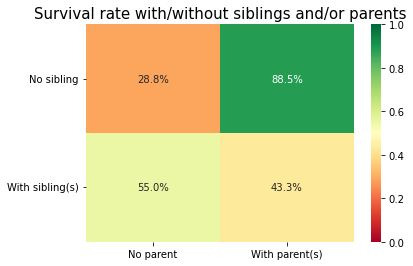

In [27]:
df2=df.copy()
df2=df2[df2['Age']<=20]
arr=np.array([[df2[(df2['SibSp']==0)&(df2['Parch']==0)]['Survived'].mean(),
              df2[(df2['SibSp']==0)&(df2['Parch']!=0)]['Survived'].mean()],
             [df2[(df2['SibSp']!=0)&(df2['Parch']==0)]['Survived'].mean(),
             df2[(df2['SibSp']!=0)&(df2['Parch']!=0)]['Survived'].mean()]])

x_axis_labels=["No parent","With parent(s)"]
y_axis_labels=["No sibling","With sibling(s)"]

_=sns.heatmap(arr,xticklabels=x_axis_labels,yticklabels=y_axis_labels,vmin=0,vmax=1,cmap="RdYlGn",annot=True,fmt=".1%")
plt.yticks(rotation=0)
_=plt.title("Survival rate with/without siblings and/or parents", fontdict={"fontsize":15})

We look at passengers &leq; 20 years old as the cut off for identifying travelling children/teenagers.<br>
We note that those who are travelling without siblings and with parents (i.e. a family comprising parents travelling with single kid) tend to have an extremely high rate of survival.<br> It is probably true that the parents tried all they could to ensure the survival of the only child.

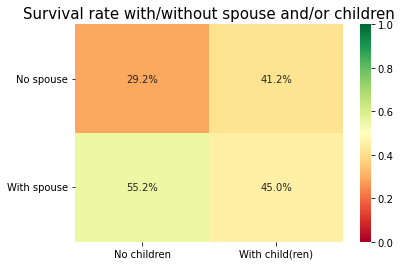

In [28]:
df2=df.copy()
df2=df2[df2['Age']>=40]
arr=np.array([[df2[(df2['SibSp']==0)&(df2['Parch']==0)]['Survived'].mean(),
              df2[(df2['SibSp']==0)&(df2['Parch']!=0)]['Survived'].mean()],
             [df2[(df2['SibSp']!=0)&(df2['Parch']==0)]['Survived'].mean(),
             df2[(df2['SibSp']!=0)&(df2['Parch']!=0)]['Survived'].mean()]])

x_axis_labels=["No children","With child(ren)"]
y_axis_labels=["No spouse","With spouse"]

_=sns.heatmap(arr,xticklabels=x_axis_labels,yticklabels=y_axis_labels,vmin=0,vmax=1,cmap="RdYlGn",annot=True,fmt=".1%")
plt.yticks(rotation=0)
_=plt.title("Survival rate with/without spouse and/or children", fontdict={"fontsize":15})

Here we look at passengers &geq; 40 years old as the cut off for identifying adults.<br>
We note that those with family (child and/or spouse) tend to have a moderate chance of survival. This may be due to their instinct to stay alive for their loved ones.<br>
Consequently, those with no children and no spouse are obsered to have a much lower survival rate. This could be due to their lack of motivation to surive the disaster....